## Gold Price Prediction

Gold is not just a commodity or a heavy metal, it is an investment, it plays an important role in deciding the rate of a currency so its good to now the most beneficial time to invest in it so that it is a profitable investment just like any other stock.This project will help you decide whether you should invest in Gold on a certain day or not. For the purpose of prediction we will be using the data from yahoo finance.

With the help of yahoo finance library we collect the data for gold for last 10 years i.e. 2010 to 2020. 


Once the data is collected we will perform various operations on it and then have a machine learnng model to predict the best time for a profictable investment

### Download external libraries

In [7]:
#Download the uninstall required libraries
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


### Import the libraries

In [23]:
#Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sweetviz as sv
import seaborn as sns

In [20]:
np.set_printoptions(suppress=True)

### Data Acquisition

In [12]:
#Read the data from yahoo finance library
Data = yf.download('GLD', '2010-01-01', '2020-12-01', auto_adjust=True)
Data.head()
data = pd.read_csv('Gold.csv')
data.head()

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
0,2017-02-06,0.79,0.79,0.76,0.76,0.79,7430.0,7.0,5848.0,7430.0,100.0,0.03,-0.03
1,2017-02-03,0.79,0.79,0.79,0.79,0.79,310.0,4.0,244.0,310.0,100.0,0.00,0.00
2,2017-02-02,0.83,0.83,0.83,0.83,0.83,75.0,1.0,62.0,75.0,100.0,0.00,0.00
3,2017-01-31,0.87,0.87,0.87,0.87,0.87,1050.0,2.0,913.0,1050.0,100.0,0.00,0.00
4,2017-01-25,0.91,0.91,0.91,0.91,0.91,400.0,1.0,364.0,400.0,100.0,0.00,0.00


The data that we have is for everyday opening price, closing price, low and high price of the gold. 

### Exploratory Data Analysis

Exploratory Data Analysis or (EDA) is understanding the data sets by summarizing their main characteristics often plotting them visually. This step is very important especially when we arrive at modeling the data in order to apply Machine learning.

In [13]:
data.shape

(1660, 13)

In [14]:
data.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
WAP                          0
No. of Shares                0
No. of Trades                0
Total Turnover               0
Deliverable Quantity         0
% Deli. Qty to Traded Qty    0
Spread H-L                   0
Spread C-O                   0
dtype: int64

In [17]:
report= sv.analyze(data)

:FEATURES DONE:                    |█████████████████████| [100%]   00:11  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [18]:
report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


### Statistical Analysis

In [21]:
data.describe()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
count,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1660.000000,1.660000e+03,1660.000000,1660.000000,1660.000000,1660.000000
mean,11.834367,12.174048,11.221578,11.673934,11.688802,101330.338554,122.983735,1.664520e+06,75754.484337,88.678651,0.952470,-0.160434
std,17.169590,17.704607,16.143363,16.837100,16.920058,140560.465729,138.844766,2.938726e+06,96646.348605,16.648158,1.960071,1.342787
min,0.500000,0.520000,0.500000,0.520000,0.000000,1.000000,1.000000,0.000000e+00,1.000000,4.760000,0.000000,-17.150000
25%,1.350000,1.380000,1.320000,1.350000,1.336219,4393.250000,14.000000,7.159500e+03,4300.000000,78.932500,0.040000,-0.150000
50%,5.255000,5.380000,4.950000,5.085000,5.119729,33871.000000,72.500000,1.086300e+05,31095.000000,100.000000,0.180000,0.000000
75%,11.392500,11.940000,11.250000,11.377500,11.451724,153416.750000,185.250000,2.057775e+06,122723.000000,100.000000,0.890000,0.030000
max,84.950000,84.950000,71.500000,74.550000,74.972394,849341.000000,752.000000,2.383048e+07,631381.000000,100.000000,23.300000,14.000000


,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Open,1.000000,0.998643,0.997655,0.997073,0.997753,0.203504,0.634499,0.811155,0.233669,-0.351982,0.803577,-0.284317
High,0.998643,1.000000,0.997543,0.998452,0.998829,0.202500,0.634280,0.810742,0.231886,-0.355465,0.816759,-0.249672
Low,0.997655,0.997543,1.000000,0.998892,0.999184,0.202328,0.634288,0.811629,0.234216,-0.345867,0.774332,-0.231531
Close,0.997073,0.998452,0.998892,1.000000,0.999739,0.203406,0.636125,0.811758,0.234558,-0.349841,0.791669,-0.210180
WAP,0.997753,0.998829,0.999184,0.999739,1.000000,0.201985,0.635319,0.810902,0.233006,-0.349460,0.792668,-0.222151
No. of Shares,0.203504,0.202500,0.202328,0.203406,0.201985,1.000000,0.573866,0.542316,0.965298,-0.604743,0.162706,-0.051611
No. of Trades,0.634499,0.634280,0.634288,0.636125,0.635319,0.573866,1.000000,0.765381,0.569486,-0.500559,0.505152,-0.136711
Total Turnover,0.811155,0.810742,0.811629,0.811758,0.810902,0.542316,0.765381,1.000000,0.557574,-0.429188,0.638468,-0.193295
Deliverable Quantity,0.233669,0.231886,0.234216,0.234558,0.233006,0.965298,0.569486,0.557574,1.000000,-0.478062,0.165507,-0.046712
% Deli. Qty to Traded Qty,-0.351982,-0.355465,-0.345867,-0.349841,-0.349460,-0.604743,-0.500559,-0.429188,-0.478062,1.000000,-0.362187,0.114005


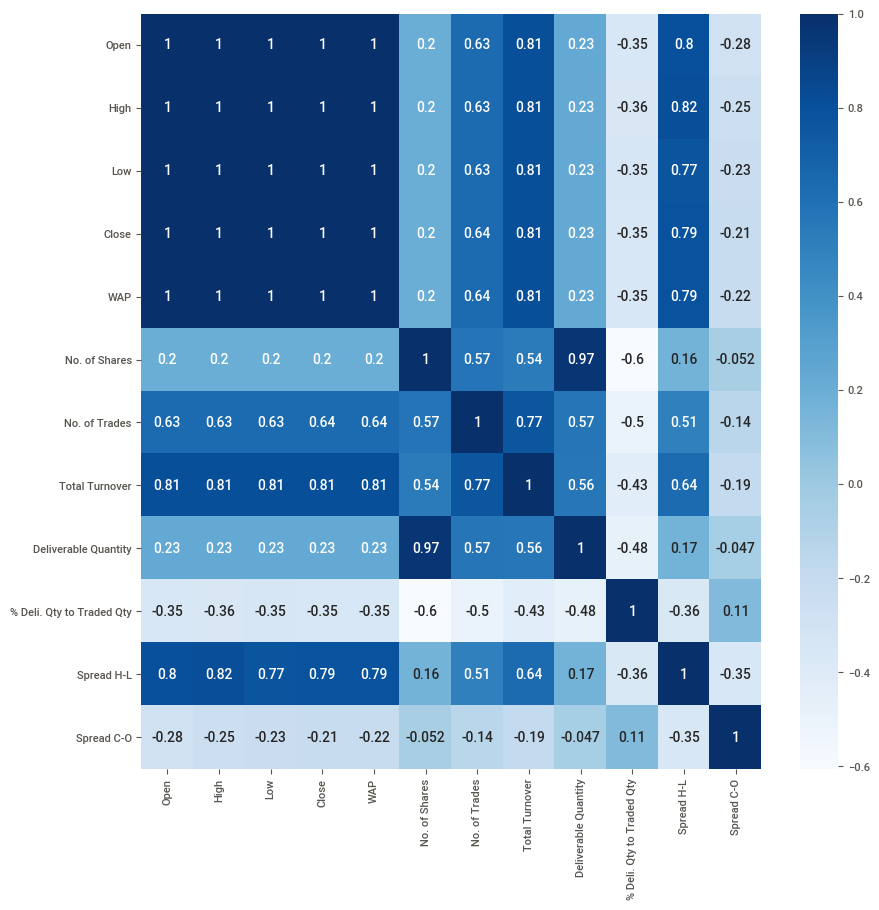

In [24]:
plt.figure(figsize=(10,10))
c= data.corr()
sns.heatmap(c,cmap='Blues',annot=True)
c